In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

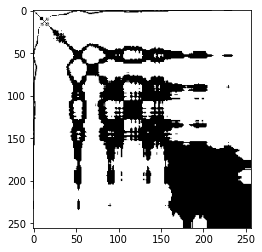

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [8]:
learning_rate = 3e-5
optimizer='Adam'
loss='binary_crossentropy'
image_size = 256 #1024, 256
dimension = 16 # ...

In [9]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent

X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        4

In [10]:
batch_size = 10
epochs = 5000

In [11]:
hist = autoencoder.train(X_train,batch_size,epochs,X_test)

Epoch 1/5000
149/149 [==============================] - ETA: 0s - loss: 0.6785
Epoch 00001: val_loss improved from inf to 0.66448, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 14s 95ms/step - loss: 0.6785 - val_loss: 0.6645
Epoch 2/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6376
Epoch 00002: val_loss improved from 0.66448 to 0.60959, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 13s 84ms/step - loss: 0.6376 - val_loss: 0.6096
Epoch 3/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5995
Epoch 00003: val_loss improved from 0.60959 to 0.59244, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 84ms/step - loss: 0.5995 - val_loss: 0.5924
Epoch 4/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5935
Epoch 00004: val_loss improved from 0.59244 to 0.58995, saving model to insectWing_dimension_16.h5
149/149 [==========

148/149 [============================>.] - ETA: 0s - loss: 0.5776
Epoch 00032: val_loss improved from 0.57827 to 0.57798, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 13s 85ms/step - loss: 0.5776 - val_loss: 0.5780
Epoch 33/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5775
Epoch 00033: val_loss improved from 0.57798 to 0.57784, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 13s 86ms/step - loss: 0.5775 - val_loss: 0.5778
Epoch 34/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5774
Epoch 00034: val_loss improved from 0.57784 to 0.57757, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5772 - val_loss: 0.5776
Epoch 35/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5770
Epoch 00035: val_loss did not improve from 0.57757
149/149 [==============================] - 12s 82ms/step - loss: 0.5771 -

Epoch 64/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5713
Epoch 00064: val_loss improved from 0.57360 to 0.57354, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5712 - val_loss: 0.5735
Epoch 65/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5710
Epoch 00065: val_loss improved from 0.57354 to 0.57334, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5708 - val_loss: 0.5733
Epoch 66/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5705
Epoch 00066: val_loss improved from 0.57334 to 0.57288, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5705 - val_loss: 0.5729
Epoch 67/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5702
Epoch 00067: val_loss did not improve from 0.57288
149/149 [==============================] - 12s 82ms/step - 

148/149 [============================>.] - ETA: 0s - loss: 0.5633
Epoch 00096: val_loss improved from 0.56821 to 0.56792, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 83ms/step - loss: 0.5634 - val_loss: 0.5679
Epoch 97/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5632
Epoch 00097: val_loss improved from 0.56792 to 0.56754, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 83ms/step - loss: 0.5633 - val_loss: 0.5675
Epoch 98/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5631
Epoch 00098: val_loss did not improve from 0.56754
149/149 [==============================] - 12s 82ms/step - loss: 0.5632 - val_loss: 0.5678
Epoch 99/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5629
Epoch 00099: val_loss did not improve from 0.56754
149/149 [==============================] - 12s 82ms/step - loss: 0.5630 - val_loss: 0.5678
Epoch 100/5000
148/149 [======

148/149 [============================>.] - ETA: 0s - loss: 0.5593
Epoch 00129: val_loss did not improve from 0.56495
149/149 [==============================] - 12s 82ms/step - loss: 0.5592 - val_loss: 0.5650
Epoch 130/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5589
Epoch 00130: val_loss improved from 0.56495 to 0.56489, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5590 - val_loss: 0.5649
Epoch 131/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5588
Epoch 00131: val_loss improved from 0.56489 to 0.56464, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5589 - val_loss: 0.5646
Epoch 132/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5590
Epoch 00132: val_loss did not improve from 0.56464
149/149 [==============================] - 12s 82ms/step - loss: 0.5589 - val_loss: 0.5653
Epoch 133/5000
148/149 [===

148/149 [============================>.] - ETA: 0s - loss: 0.5563
Epoch 00163: val_loss did not improve from 0.56353
149/149 [==============================] - 12s 82ms/step - loss: 0.5563 - val_loss: 0.5636
Epoch 164/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5563
Epoch 00164: val_loss did not improve from 0.56353
149/149 [==============================] - 12s 81ms/step - loss: 0.5562 - val_loss: 0.5635
Epoch 165/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5559
Epoch 00165: val_loss improved from 0.56353 to 0.56350, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5560 - val_loss: 0.5635
Epoch 166/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5560
Epoch 00166: val_loss did not improve from 0.56350
149/149 [==============================] - 12s 81ms/step - loss: 0.5561 - val_loss: 0.5638
Epoch 167/5000
148/149 [============================>.] - ETA: 0s - loss: 0

Epoch 198/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5541
Epoch 00198: val_loss did not improve from 0.56240
149/149 [==============================] - 12s 82ms/step - loss: 0.5540 - val_loss: 0.5639
Epoch 199/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5540
Epoch 00199: val_loss did not improve from 0.56240
149/149 [==============================] - 12s 81ms/step - loss: 0.5539 - val_loss: 0.5626
Epoch 200/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5538
Epoch 00200: val_loss did not improve from 0.56240
149/149 [==============================] - 12s 81ms/step - loss: 0.5537 - val_loss: 0.5630
Epoch 201/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5535
Epoch 00201: val_loss did not improve from 0.56240
149/149 [==============================] - 12s 81ms/step - loss: 0.5536 - val_loss: 0.5626
Epoch 202/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5536
Epoch 00202: val_loss impro

Epoch 234/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5521
Epoch 00234: val_loss improved from 0.56196 to 0.56190, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5519 - val_loss: 0.5619
Epoch 235/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5520
Epoch 00235: val_loss did not improve from 0.56190
149/149 [==============================] - 12s 82ms/step - loss: 0.5519 - val_loss: 0.5620
Epoch 236/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5519
Epoch 00236: val_loss did not improve from 0.56190
149/149 [==============================] - 12s 84ms/step - loss: 0.5517 - val_loss: 0.5620
Epoch 237/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5517
Epoch 00237: val_loss did not improve from 0.56190
149/149 [==============================] - 12s 84ms/step - loss: 0.5518 - val_loss: 0.5622
Epoch 238/5000
148/149 [============================>.] - ET

Epoch 270/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5502
Epoch 00270: val_loss did not improve from 0.56168
149/149 [==============================] - 12s 82ms/step - loss: 0.5502 - val_loss: 0.5617
Epoch 271/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5502
Epoch 00271: val_loss did not improve from 0.56168
149/149 [==============================] - 12s 82ms/step - loss: 0.5502 - val_loss: 0.5617
Epoch 272/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5503
Epoch 00272: val_loss did not improve from 0.56168
149/149 [==============================] - 12s 82ms/step - loss: 0.5503 - val_loss: 0.5625
Epoch 273/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5500
Epoch 00273: val_loss improved from 0.56168 to 0.56151, saving model to insectWing_dimension_16.h5
149/149 [==============================] - 12s 82ms/step - loss: 0.5501 - val_loss: 0.5615
Epoch 274/5000
148/149 [============================>.] - ET

Epoch 307/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5487
Epoch 00307: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5487 - val_loss: 0.5619
Epoch 308/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5486
Epoch 00308: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5487 - val_loss: 0.5628
Epoch 309/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5486
Epoch 00309: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5485 - val_loss: 0.5620
Epoch 310/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5486
Epoch 00310: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5485 - val_loss: 0.5616
Epoch 311/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5484- ETA: 0s - l
Epoch 00311: v

Epoch 344/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5474
Epoch 00344: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 83ms/step - loss: 0.5472 - val_loss: 0.5621
Epoch 345/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5474
Epoch 00345: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5472 - val_loss: 0.5626
Epoch 346/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5473
Epoch 00346: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5472 - val_loss: 0.5625
Epoch 347/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5473
Epoch 00347: val_loss did not improve from 0.56151
149/149 [==============================] - 12s 82ms/step - loss: 0.5472 - val_loss: 0.5619
Epoch 348/5000
148/149 [============================>.] - ETA: 0s - loss: 0.5472
Epoch 00348: val_loss did n

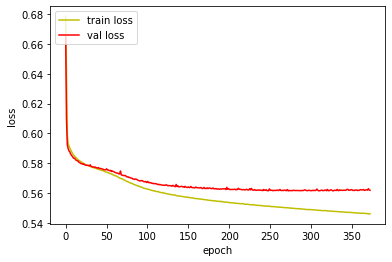

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [13]:
feature = autoencoder.feature_extract(X_scaled)

ResourceExhaustedError: OOM when allocating tensor with shape[1980,256,256,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]

In [13]:
features = np.empty((0,16), float)
for i in range(66):
    features = np.append(features, autoencoder.feature_extract(X_scaled[i*30:(i+1)*30]), axis=0)

print(features.shape)

(1980, 16)


In [48]:
from sklearn.cluster import KMeans
# Cluster Algorithm
result = KMeans(n_clusters=11).fit(features)
from sklearn.metrics import silhouette_samples,silhouette_score

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km.labels_)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(X, y_km.labels_,metric='euclidean')
    print(silhouette_vals)
    
plotSilhouette(features,result)


0.10733952139479039


0.11579906138338754


In [46]:
from keras.models import save_model
autoencoder.model.save_weights("insectWing_binary_16_128_0.5885.h5")